# Надыршина Алёна РТ5-61Б(Вариант 15)

## Задача №2.

Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

## Набор данных:

https://www.kaggle.com/lava18/google-play-store-apps

## Дополнительные требования по группам:

Для студентов группы РТ5-61Б - для пары произвольных колонок данных построить график "Jointplot".

## Импорт библиотек

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
%matplotlib inline
sns.set(style='ticks')

## Загрузка данных

In [4]:
data = pd.read_csv("googleplaystore.csv")
#Размерность данных
data.shape

(10841, 13)

In [5]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Количественный признак: Rating.

Категориальный признак: Content Rating.

In [20]:
#Заполним пропущенные значения нулями
data['Rating'].fillna(0, inplace=True)

In [21]:
cat_temp_data = data[['Content Rating']]
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data[['Content Rating']]=data_imp2

In [22]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [28]:
data['Rating'] = data['Rating'].replace(to_replace=19.0, value=5.0)

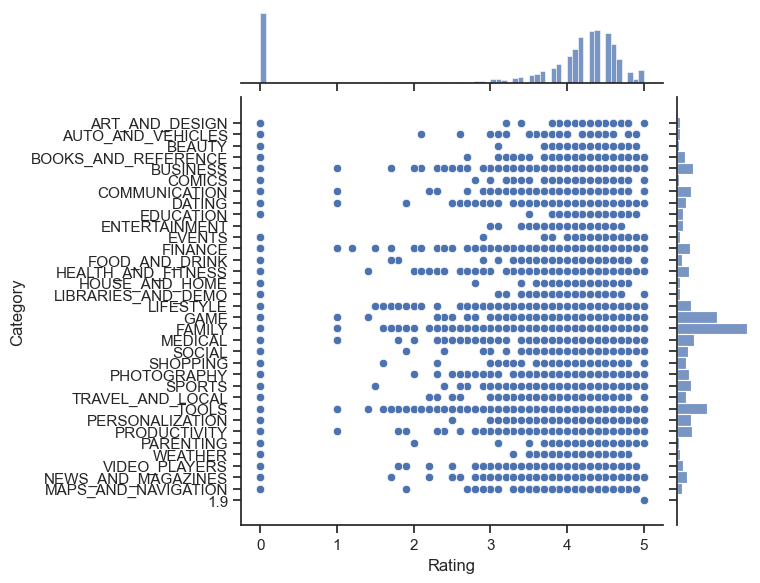

In [29]:
sns.jointplot(x='Rating', y='Category', data=data)

Для дальнейшего построения моделей машинного обучения я буду использовать Category, Content Rating, Price, Installs, Size, Current Ver, 
Android Ve.r 

Все эти признаки должны иметь корреляцию с оценкой, поставленной пользователем.

Остальные признаки либо не несут никакой информации для модели, либо дублируются. 